# 13장: 최단 경로 문제

- 최단경로 문제란?: 각 간선의 가중치 합이 최소가 되는 두 정점 (또는 노드) 사이의 경로를 찾는 문제

- 정점 (Vertex)은 교차로에 해당

- 간선 (Edge)은 길에 해당

- 그래프의 종류와 특성에 따라 각각 최적화된 다양한 최단 경로 알고리즘이 존재함

  e.g.) 다익스트라 (Dijkstra) 알고리즘

- 다익스트라 알고리즘은 항상 노드 주변의 최단 경로만 택하는 대표적인 그리디 (Greedy) 알고리즘 중 하나, 단순하고 실행 속도가 빠름

- DFS (깊이 우선 탐색)는 한 사람이 미로를 찾아 헤매는 과정과 비슷함

- BFS는 여러명의 사람이 각기 서로 다른 갈림길로 흩어져서 길을 찾는 것과 비슷함


- [다익스트라는 가중치가 음수인 경우 처리할 수 없음](https://hy38.github.io/why-dijkstra-fail-on-a-negative-weighted-edge)

  (1) (가중치의 합이 음수인) 음수 사이클의 발생 가능성

  (2) Edge Relaxation 계산의 오류 가능성

  (3) 회피시의 시간복잡도

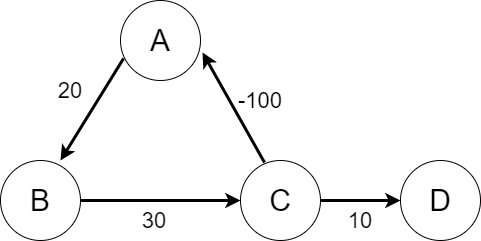

- (1) 그래프에서 사이클은 상황에 따라 존재할 수 있지만, 가중치 합이 음수인 음수 사이클이 존재할 경우 상황이 복잡해짐

  e.g.) A에서 D로 가는 최단거리는 

  ~~~
  A - B - C - D
  ~~~

  으로 60 이지만, 음수 사이클의 존재 때문에 

  ~~~
  A - B - C - A - B - C - D
  ~~~

  는 10으로,

  ~~~
  A - B - C - A - B - C - A - B - C - D
  ~~~

  는 -40으로 계산되고 최단 경로가 음의 무한대로 발산하게 됨

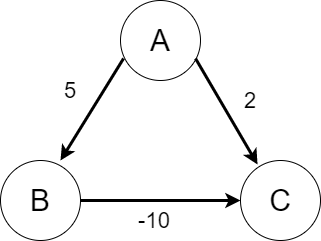

- (2) 음수 간선이 존재하게 되면 relax 연산이 잘못 수행될 수 있는 여지가 있음

  e.g.) 시작점: A, 다익스트라, min-heap 우선순위 큐

  위 그래프에서 초기 dist는 시작점 A를 제외하고 모두 양의 무한대임 (시작점은 0, 나머지는 무한대로 초기화 하는게 국룰)

  $$dist[A] + cost(A, C) < dist[C]$$
  
  ~~~
  - dist[V]는 최단 경로 추정값
  
  - relax는 최단 경로 추정값을 통해 d[V] 를 업데이트 할지 말지를 결정 
  ~~~
  이기에, $dist[C]$를 $dist[A] + cost(A, C)$인 2로 relax 해줌

  마찬가지로 $dist[B]$ 또한 relax를 해줌

  이 때, 간선 AC의 가중치가 AB의 가중치보다 작기 때문에, 우선순위 큐에 들어가 있는 B와 C중 C를 먼저 꺼내게 됨

  이후 다익스트라 알고리즘은 $dist[C]$를 최단거리로 인식하고 더이상 relax를 진행하지 않음

  이렇게 되면 $dist[C]$는 2로 남게 되지만, 정작 최단거리는 -5이어야 함

  결과적으로 다익스트라 알고리즘이 제대로 작동하지 못하게 된 것
  
  이는 다익스트라 알고리즘이 그리디 알고리즘이기 때문



- (3) 다익스트라 알고리즘의 코드를 잘 수정하여 "Priority queue"에 계속 update 해주는 방식의 회피법이 존재하지만, 최악의 경우 지수시간이라는 매우 느린 복잡도를 갖게됨

- 음수 간선이 존재할 경우의 대안: 

  (1) 벨만-포드 알고리즘

  (2) SPFA 알고리즘

  ~~(3) 모든 간선의 가중치에 수를 더해서 가중치를 모두 양수로 만들기~~: 이떄 구해지는 최단거리는 $(우리가 더해준 가중치) + (출발점으로부터 지나온 간선의 수)$ 만큼 더해져서 나오게됨. 
  
  결과적으로 (1), (2)는 해결해도 문제는 해결 못함

- 다익스트라의 시간복잡도는 너비 우선 탐색 (BFS)시 가장 가까운 순서를 찾을 때 우선순위 큐를 적용하여 시간복잡도가 $$O((V + E)logV)$$, 모든 정점이 출발지에서 도달이 가능하다면 최종적으로 $$O(ElogV)$$가 됨

## 13-40: 네트워크 딜레이 타임

- K부터 출발해 모든 노드가 신호를 받을 수 있는 시간을 계산하라. 불가능할 경우 -1을 리턴한다. 입력값 $(u, v, w)$는 각각 출발지, 도착지, 소요 시간으로 구성되며, 전체 노드의 개수는 N으로 입력받는다. 

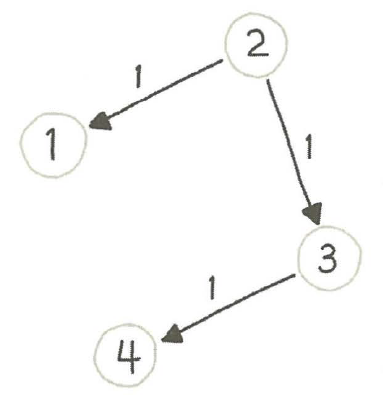

- 입력

~~~
times = [[2, 1, 1], [2, 3, 1], [3, 4, 1]], N = 4, K = 2
~~~

- 출력 

~~~
2
~~~

- 이 문제는 두가지를 판별해야됨

  (1) 모든 노드가 신호를 받는 데 걸리는 시간

  (2) 모든 노드에 도달할 수 있는지 여부

- (1) 모든 노드가 신호를 받는 데 걸리는 시간 → 가장 오래 걸리는 노드까지의 시간

  가장 오래 걸리는 노드까지의 최단 시간을 말하고 이는 다익스트라로 추출할 수 있음

- (2) 모든 노드에 도달할 수 있는지 여부 → 모든 노듸의 다익스트라 알고리즘 계산값이 존재하는지 유무로 판별할 수 있음

  e.g.) 만약 노드가 8개인데 다익스트라 알고리즘 계산은 7개밖에 할 수 없다면, 나머지 한 노드에는 도달할 수 없다는 뜻임

  -1 리턴

- 우선순위 큐를 최소 힙 (Min Heap)으로 구현한 모듈인 heapq를 사용

In [24]:
from typing import List
from collections import defaultdict
import heapq

def network_daily_time(times: List[List[int]], N: int, K: int) -> int:
  graph = defaultdict(list)

  # 그래프로 인접 리스트 구성
  for u, v, w in times: # u: 출발지, v: 도착지, w: 소요 시간
    print("u: ", u)
    print("v: ", v)
    print("w: ", w)
    print(" ")
    graph[u].append((v, w))

  print("graph: ", graph)
  print(" ")

  # 큐변수: [(소요시간, 정점)]
  Q = [[0, K]] # 시작 지점 0으로 초기화. 여기선 "2"

  dist = defaultdict(int) # 노드까지 최단거리가 쌓이는 변수

  """
  (1) 모든 노드가 신호를 받는 데 걸리는 시간
  """
  # 우선순위 큐 최소값 기준으로 정점까지 최단경로 삽입
  while Q: # 우선순위 큐이므로 값이 계속 쌓이다가 낮은 값부터 하나씩 추출되면서 제거됨
    time, node = heapq.heappop(Q)
    print("Q: ", Q)
    print("time: ", time)
    print("node: ", node)
    print(" ")

    if node not in dist:
      dist[node] = time
      print("dist: ", dist)

      for v, w in graph[node]: # graph[node]: 도착지 "v", 소요시간 "w"가 들어있음
        alt = time + w
        heapq.heappush(Q, (alt, v))

  """
  (2) 모든 노드의 최단 경로 존재 여부 판별
  """
  print(" ")
  print("dist.values(): ", dist.values())
  print(" ")

  if len(dist) == N:
    return max(dist.values())
  
  return -1
  
# result = 2
times = [[2, 1, 1], [2, 3, 1], [3, 4, 1]]
N = 4
K = 2

# times = [[3, 1, 5], [3, 2, 2], [2, 1, 2], [3, 4, 1], [4, 5, 1], [5, 6, 1], [6, 7, 1], [7, 8, 1], [8, 1, 1]]
# N = 8
# K = 3
print("result: ", network_daily_time(times, N, K))

u:  2
v:  1
w:  1
 
u:  2
v:  3
w:  1
 
u:  3
v:  4
w:  1
 
graph:  defaultdict(<class 'list'>, {2: [(1, 1), (3, 1)], 3: [(4, 1)]})
 
Q:  []
time:  0
node:  2
 
dist:  defaultdict(<class 'int'>, {2: 0})
Q:  [(1, 3)]
time:  1
node:  1
 
dist:  defaultdict(<class 'int'>, {2: 0, 1: 1})
Q:  []
time:  1
node:  3
 
dist:  defaultdict(<class 'int'>, {2: 0, 1: 1, 3: 1})
Q:  []
time:  2
node:  4
 
dist:  defaultdict(<class 'int'>, {2: 0, 1: 1, 3: 1, 4: 2})
 
dist.values():  dict_values([0, 1, 1, 2])
 
result:  2


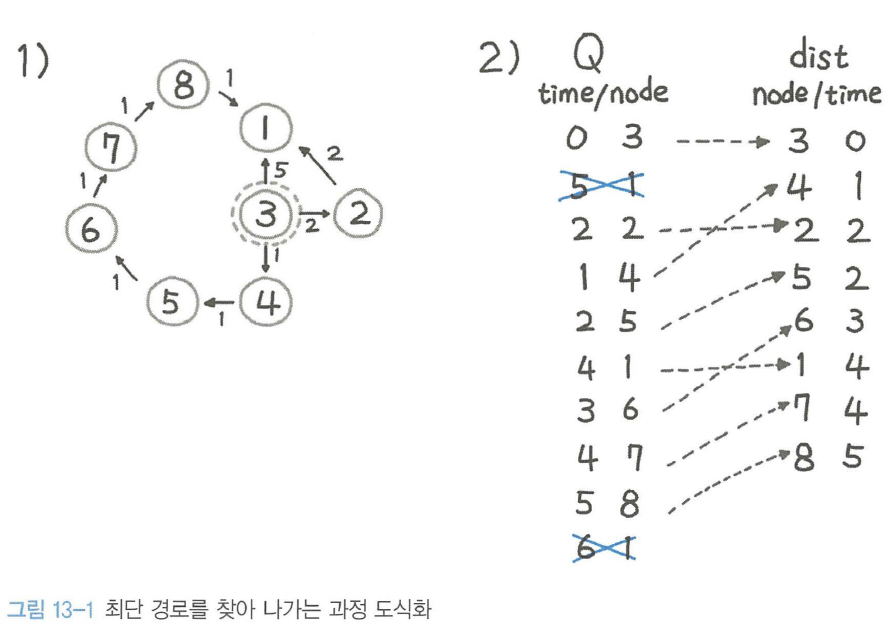